In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv('tree/iris_data.csv')
data.head()

,sepal length,sepal width,petal length,petal width,target,label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [3]:
X=data.drop(['target','label'],axis=1)
y=data.loc[:,'label']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [7]:
y_predict=knn.predict(X)

In [9]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y,y_predict)
accuracy

0.96

In [13]:
from sklearn.preprocessing import StandardScaler
X_norm=StandardScaler().fit_transform(X)

(array([ 1.,  0.,  3.,  0.,  0.,  1.,  0.,  0.,  4.,  0.,  0.,  2.,  0.,
         5.,  0.,  0.,  6.,  0.,  0., 10.,  0.,  0.,  9.,  0.,  0.,  4.,
         0.,  1.,  0.,  0.,  6.,  0.,  0.,  7.,  0.,  0.,  6.,  0.,  8.,
         0.,  0.,  7.,  0.,  0.,  3.,  0.,  0.,  6.,  0.,  6.,  0.,  0.,
         4.,  0.,  0.,  9.,  0.,  0.,  7.,  0.,  0.,  5.,  0.,  2.,  0.,
         0.,  8.,  0.,  0.,  3.,  0.,  0.,  4.,  0.,  0.,  1.,  0.,  1.,
         0.,  0.,  3.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  4.,  0.,  0.,  0.,  0.,  1.]),
 array([-1.87002413, -1.8264037 , -1.78278327, -1.73916283, -1.6955424 ,
        -1.65192197, -1.60830153, -1.5646811 , -1.52106067, -1.47744023,
        -1.4338198 , -1.39019937, -1.34657893, -1.3029585 , -1.25933807,
        -1.21571763, -1.1720972 , -1.12847677, -1.08485633, -1.0412359 ,
        -0.99761547, -0.95399503, -0.9103746 , -0.86675417, -0.82313373,
        -0.7795133 , -0.73589287, -0.69227243, -0.648652  , -0.605031

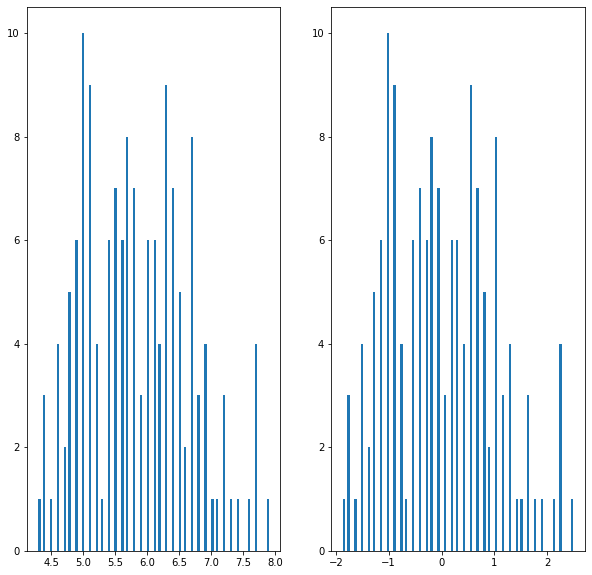

In [17]:
from matplotlib import pyplot as plt
fig1=plt.figure(figsize=(10,10))
plt.subplot(121)
plt.hist(X.loc[:,'sepal length'],bins=100)
plt.subplot(122)
plt.hist(X_norm[:,0],bins=100)

In [18]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
X_pca=pca.fit_transform(X_norm)

In [20]:
var_ratio=pca.explained_variance_ratio_
var_ratio

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

<BarContainer object of 4 artists>

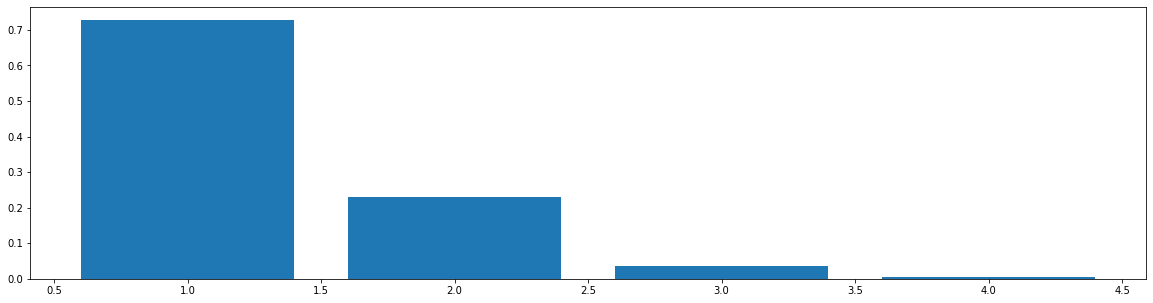

In [21]:
fig2=plt.figure(figsize=(20,5))
plt.bar([1,2,3,4],var_ratio)

In [23]:
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_norm)
X_pca.shape

(150, 2)

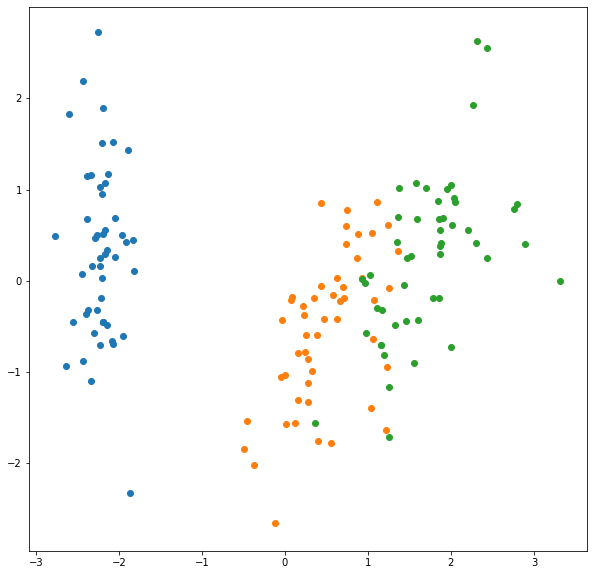

In [28]:
fig3=plt.figure(figsize=(10,10))
plt.scatter(X_pca[:,0][y==0],X_pca[:,1][y==0])
plt.scatter(X_pca[:,0][y==1],X_pca[:,1][y==1])
plt.scatter(X_pca[:,0][y==2],X_pca[:,1][y==2])

In [30]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X,y)
accuracy=accuracy_score(y,y_predict)
accuracy

0.96